In [1]:
! pip install lightgbm 

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('creditData.csv')
df.head()

,customer_id,gender,location,age,monthly_income,monthly_emi_outflow,total_credit_limit,current_outstanding,credit_utilization_ratio,num_open_loans,repayment_history_score,months_since_last_default,dpd_last_3_months,num_hard_inquiries_last_6m,recent_credit_card_usage,recent_loan_disbursed_amount,target_credit_score_movement
0,1,male,Noida,28,29464,3160,80000,12955,0.14,3,59,31,17,3,29882.13,97194,Stable
1,2,female,Raebareli,26,43560,33431,130000,69870,0.76,2,43,29,0,6,75670.64,6799,Decrease
2,3,male,Shimla,25,28564,19916,90000,21907,0.60,3,50,0,0,4,41283.37,135404,Stable
3,4,male,Haldwani,24,36844,27352,80000,330412,0.34,3,55,0,0,4,26126.75,96988,Stable
4,5,male,Port Blair,24,21061,18494,50000,223592,0.79,3,89,0,81,0,7798.58,241208,Decrease


In [4]:
gender_map = {'male': 0, 'female': 1}
df['gender_encoded'] = df['gender'].map(gender_map)
df.head()

,customer_id,gender,location,age,monthly_income,monthly_emi_outflow,total_credit_limit,current_outstanding,credit_utilization_ratio,num_open_loans,repayment_history_score,months_since_last_default,dpd_last_3_months,num_hard_inquiries_last_6m,recent_credit_card_usage,recent_loan_disbursed_amount,target_credit_score_movement,gender_encoded
0,1,male,Noida,28,29464,3160,80000,12955,0.14,3,59,31,17,3,29882.13,97194,Stable,0
1,2,female,Raebareli,26,43560,33431,130000,69870,0.76,2,43,29,0,6,75670.64,6799,Decrease,1
2,3,male,Shimla,25,28564,19916,90000,21907,0.60,3,50,0,0,4,41283.37,135404,Stable,0
3,4,male,Haldwani,24,36844,27352,80000,330412,0.34,3,55,0,0,4,26126.75,96988,Stable,0
4,5,male,Port Blair,24,21061,18494,50000,223592,0.79,3,89,0,81,0,7798.58,241208,Decrease,0


In [5]:
target_map = {'Increase': 2, 'Stable': 1, 'Decrease': 0}
df['target_score'] = df['target_credit_score_movement'].map(target_map)
df.head()

,customer_id,gender,location,age,monthly_income,monthly_emi_outflow,total_credit_limit,current_outstanding,credit_utilization_ratio,num_open_loans,repayment_history_score,months_since_last_default,dpd_last_3_months,num_hard_inquiries_last_6m,recent_credit_card_usage,recent_loan_disbursed_amount,target_credit_score_movement,gender_encoded,target_score
0,1,male,Noida,28,29464,3160,80000,12955,0.14,3,59,31,17,3,29882.13,97194,Stable,0,1
1,2,female,Raebareli,26,43560,33431,130000,69870,0.76,2,43,29,0,6,75670.64,6799,Decrease,1,0
2,3,male,Shimla,25,28564,19916,90000,21907,0.60,3,50,0,0,4,41283.37,135404,Stable,0,1
3,4,male,Haldwani,24,36844,27352,80000,330412,0.34,3,55,0,0,4,26126.75,96988,Stable,0,1
4,5,male,Port Blair,24,21061,18494,50000,223592,0.79,3,89,0,81,0,7798.58,241208,Decrease,0,0


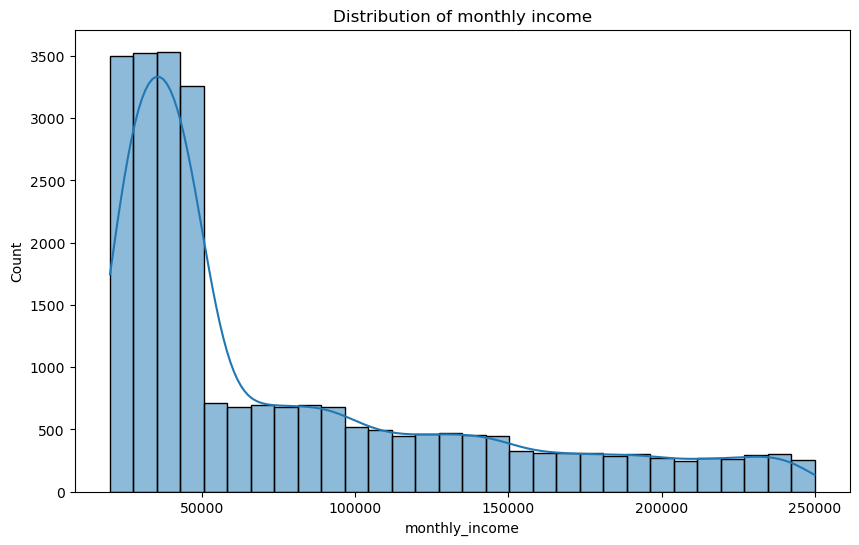

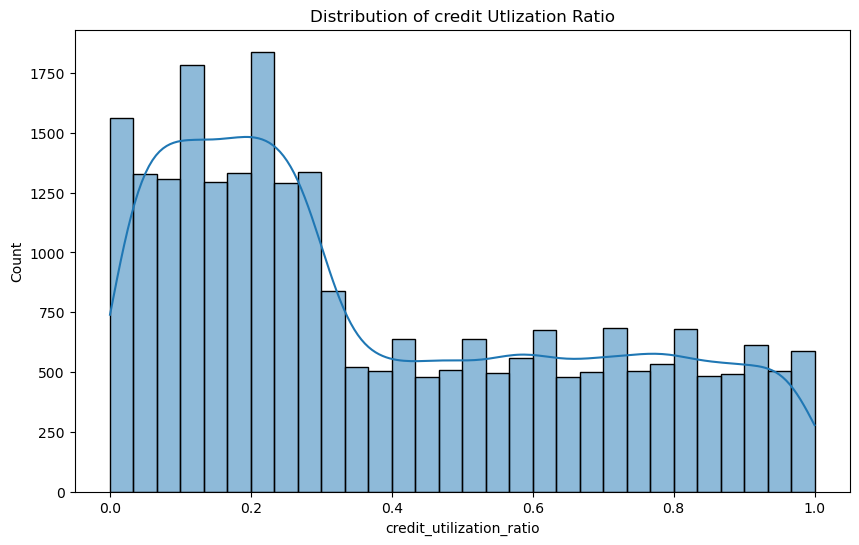

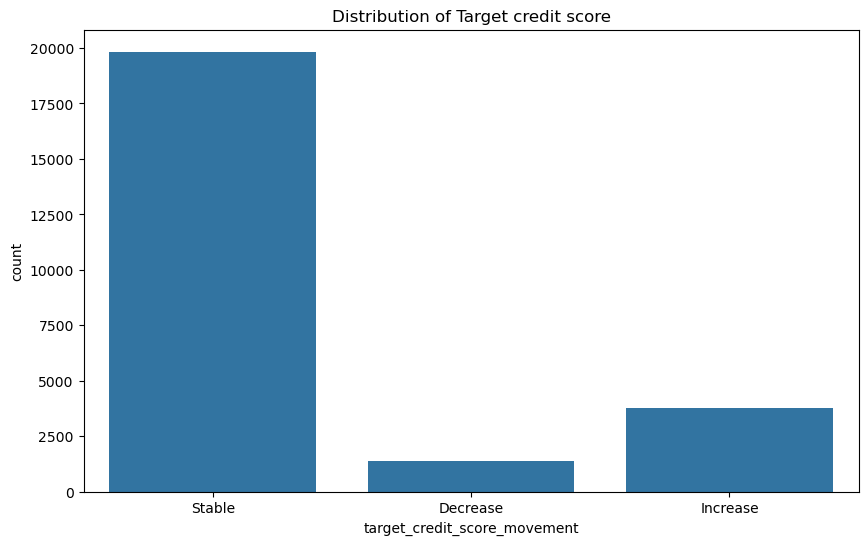

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# monthly income plot 
plt.figure(figsize=(10,6))
sns.histplot(df['monthly_income'], kde = True, bins = 30)
plt.title('Distribution of monthly income')
plt.show()

# credit utlization ratio plot
plt.figure(figsize=(10,6))
sns.histplot(df['credit_utilization_ratio'], kde = True, bins = 30)
plt.title('Distribution of credit Utlization Ratio')
plt.show()

# target score plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='target_credit_score_movement')
plt.title('Distribution of Target credit score')
plt.show()

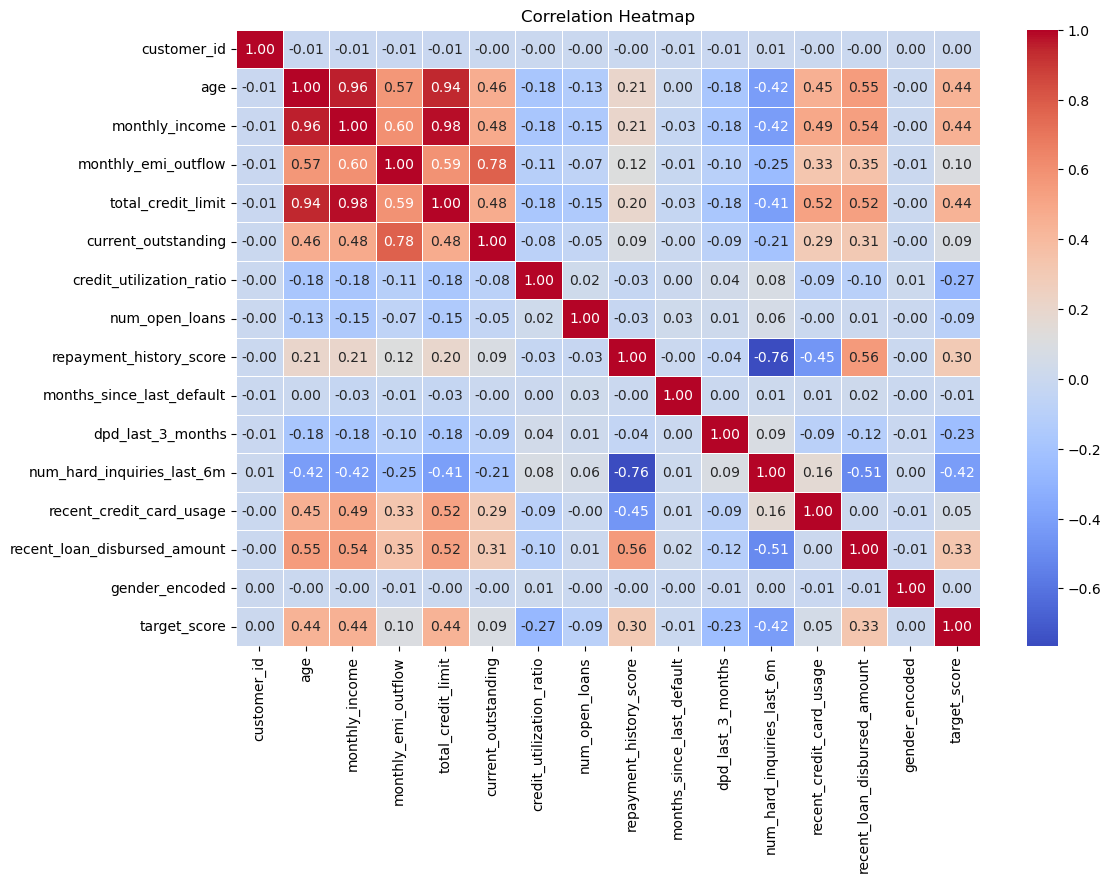

In [7]:
# correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   25000 non-null  int64  
 1   gender                        25000 non-null  object 
 2   location                      25000 non-null  object 
 3   age                           25000 non-null  int64  
 4   monthly_income                25000 non-null  int64  
 5   monthly_emi_outflow           25000 non-null  int64  
 6   total_credit_limit            25000 non-null  int64  
 7   current_outstanding           25000 non-null  int64  
 8   credit_utilization_ratio      25000 non-null  float64
 9   num_open_loans                25000 non-null  int64  
 10  repayment_history_score       25000 non-null  int64  
 11  months_since_last_default     25000 non-null  int64  
 12  dpd_last_3_months             25000 non-null  int64  
 13  n

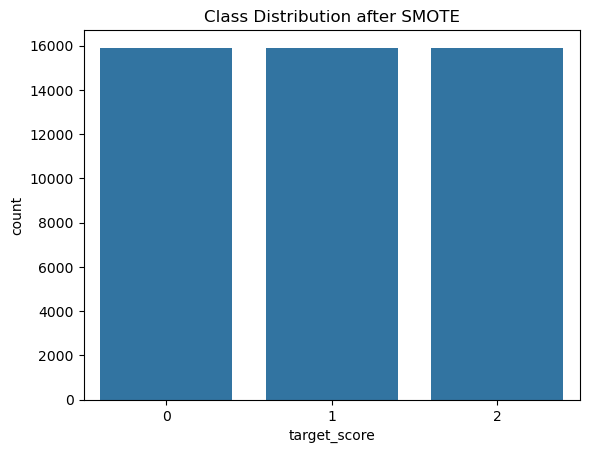

In [24]:
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['customer_id','target_credit_score_movement','target_score','location', 'gender', 'gender_encoded'])
y = df['target_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# handling inbalance with smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train_resampled)
plt.title("Class Distribution after SMOTE")
plt.show()

In [25]:
# K-fold cross validation 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    accuracies = []
    f1_scores = []
    recalls = []

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)

        accuracies.append(accuracy_score(y_val_fold, y_pred))
        f1_scores.append(f1_score(y_val_fold, y_pred, average='weighted'))
        recalls.append(recall_score(y_val_fold, y_pred, average='weighted'))

    return np.mean(accuracies), np.mean(f1_scores), np.mean(recalls)

In [26]:
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# hyperparameter
param_grid = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0],
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear'],
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 50],
    }
}

#  gridsearchCV for each model
def grid_search_for_model(model_name, model, param_grid):
    print(f"starting gridsearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)  #parallel processing
    grid_search.fit(X_train_resampled, y_train_resampled)
    return model_name, grid_search.best_estimator_, grid_search.best_params_

# running gridsearchcv parallel for all models
results = Parallel(n_jobs=-1)(delayed(grid_search_for_model)(model_name, model, param_grid[model_name]) for model_name, model in models.items())

# results
best_models = {}
for model_name, best_model, best_params in results:
    print(f"Best parameters for {model_name}: {best_params}")
    best_models[model_name] = best_model  


Best parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best parameters for LogisticRegression: {'C': 10, 'solver': 'lbfgs'}
Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 50}


In [27]:
final_results = {}
for model_name, best_model, _ in results:
    y_pred_test = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    class_recall = recall_score(y_test, y_pred_test, average=None)

    final_results[model_name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Class-wise Recall': class_recall
    }

final_results_df = pd.DataFrame(final_results).T
print(final_results_df)


                   Accuracy  F1-Score  \
RandomForest          0.926  0.928534   
XGBoost               0.951  0.952019   
LogisticRegression    0.663  0.699859   
LightGBM              0.961  0.961686   

                                                    Class-wise Recall  
RandomForest        [0.7587412587412588, 0.9372618745237491, 0.930...  
XGBoost             [0.8566433566433567, 0.9565659131318263, 0.957...  
LogisticRegression  [0.7482517482517482, 0.6581153162306325, 0.656...  
LightGBM            [0.8846153846153846, 0.9669799339598679, 0.958...  


In [28]:
# based on the results LightGBM is to be the best model
best_model_name = 'LightGBM'
print(f"Best model based on F1-score: {best_model_name}")

Best model based on F1-score: LightGBM


<Figure size 640x480 with 0 Axes>

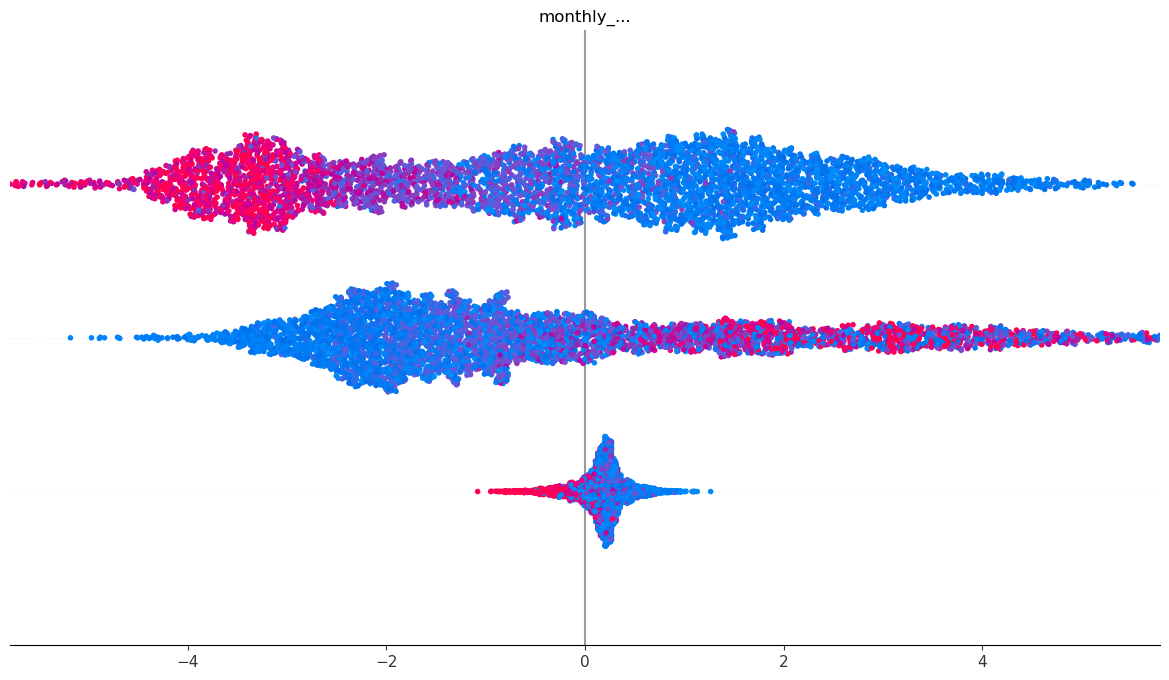

In [29]:
import shap

best_model_name = 'LightGBM'
best_model = next(model for model_name, model, _ in results if model_name == best_model_name)

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test)

In [30]:
# Shape of SHAP values
print("SHAP values shape:", len(shap_values))
print("Shape of shap_values[0]:", shap_values[0].shape)
print("Number of features in X_test:", len(X_test.columns))

# Check for list or array structure 
if isinstance(shap_values, list):
    # For multi-class, SHAP values are structured as [class_0, class_1, class_2]
    
    # For increase class 
    feature_importance_increase = pd.DataFrame({
        'feature': X_test.columns,
        'abs_shap': np.abs(shap_values[0]).mean(axis=0)
    }).sort_values('abs_shap', ascending=False)
    
    # For stable class 
    feature_importance_stable = pd.DataFrame({
        'feature': X_test.columns,
        'abs_shap': np.abs(shap_values[1]).mean(axis=0)
    }).sort_values('abs_shap', ascending=False)
    
    # For decrease class 
    feature_importance_decrease = pd.DataFrame({
        'feature': X_test.columns,
        'abs_shap': np.abs(shap_values[2]).mean(axis=0)
    }).sort_values('abs_shap', ascending=False)
else:
    # If it's a 3D array [samples, features, classes]
    
    # For increase class 
    feature_importance_increase = pd.DataFrame({
        'feature': X_test.columns,
        'abs_shap': np.abs(shap_values[:, :, 0]).mean(axis=0)
    }).sort_values('abs_shap', ascending=False)
    
    # For stable class 
    feature_importance_stable = pd.DataFrame({
        'feature': X_test.columns,
        'abs_shap': np.abs(shap_values[:, :, 1]).mean(axis=0)
    }).sort_values('abs_shap', ascending=False)
    
    # For decrease class
    feature_importance_decrease = pd.DataFrame({
        'feature': X_test.columns,
        'abs_shap': np.abs(shap_values[:, :, 2]).mean(axis=0)
    }).sort_values('abs_shap', ascending=False)

# Results for each class 
print("Top 10 features for Increase in Credit Score:")
print(feature_importance_increase.head(10))

print("\nTop 10 features for Stable Credit Score:")
print(feature_importance_stable.head(10))

print("\nTop 10 features for Decrease in Credit Score:")
print(feature_importance_decrease.head(10))


SHAP values shape: 5000
Shape of shap_values[0]: (13, 3)
Number of features in X_test: 13
Top 10 features for Increase in Credit Score:
                         feature  abs_shap
10    num_hard_inquiries_last_6m  1.757436
9              dpd_last_3_months  1.426764
5       credit_utilization_ratio  1.339255
2            monthly_emi_outflow  1.231929
1                 monthly_income  1.031181
8      months_since_last_default  0.416477
3             total_credit_limit  0.368101
0                            age  0.367168
12  recent_loan_disbursed_amount  0.362311
11      recent_credit_card_usage  0.351008

Top 10 features for Stable Credit Score:
                         feature  abs_shap
10    num_hard_inquiries_last_6m  1.127319
12  recent_loan_disbursed_amount  0.581753
3             total_credit_limit  0.571479
5       credit_utilization_ratio  0.542512
7        repayment_history_score  0.497940
8      months_since_last_default  0.370153
9              dpd_last_3_months  0.337190
2    

### SHAP Analysis: Feature Impact

In this project, I used **SHAP** to interpret the predictions of the model. Below are the key insights derived from the SHAP analysis, showcasing the most influential features for each **credit score movement outcome** based on the **LightGBM**, **RandomForest**, **XGBoost**, and **Logistic Regression** models.

---

### **Model Performance**
Here are the performance metrics for the models:

- **LightGBM**  
  **Accuracy** = 0.961,  
  **F1-Score** = 0.9617

- **XGBoost**  
  **Accuracy** = 0.951,  
  **F1-Score** = 0.9520

- **RandomForest**  
  **Accuracy** = 0.926,  
  **F1-Score** = 0.9285

- **LogisticRegression**  
  **Accuracy** = 0.663,  
  **F1-Score** = 0.6999

---

#### **Decrease in Credit Score**
The following features were identified as the most significant in predicting a **decrease** in credit score:

1. **`credit_utilization_ratio`**: Higher credit utilization significantly increases the likelihood of a decrease in credit score.
2. **`dpd_last_3_months`**: More days past due (dpd) directly correlate with a decrease in credit score.
3. **`num_hard_inquiries_last_6m`**: Increased hard inquiries are a strong indicator that the credit score may decrease.
4. **Other Important Features**:
   - **`monthly_income`**
   - **`monthly_emi_outflow`**
   - **`repayment_history_score`**
   - **`total_credit_limit`**
   - **`recent_loan_disbursed_amount`**
   - **`recent_credit_card_usage`**
   - **`months_since_last_default`**

---

#### **Stable Credit Score**  
The following features contribute most to predicting a **stable** credit score:

1. **`num_hard_inquiries_last_6m`**: A relatively low number of hard inquiries helps maintain a stable score.
2. **`repayment_history_score`**: A solid repayment history is a strong indicator of a stable credit score.
3. **`total_credit_limit`**: A higher total credit limit is associated with a more stable credit score.
4. **Other Important Features**:
   - **`credit_utilization_ratio`**
   - **`months_since_last_default`**
   - **`recent_loan_disbursed_amount`**
   - **`dpd_last_3_months`**
   - **`gender_encoded`**
   - **`monthly_emi_outflow`**
   - **`monthly_income`**

---

#### **Increase in Credit Score**  
The following features were identified as the most significant in predicting an **increase** in credit score:

1. **`num_hard_inquiries_last_6m`**: A lower number of recent hard inquiries is positively correlated with an increase in credit score.
2. **`credit_utilization_ratio`**: A lower credit utilization ratio is strongly associated with an increase in credit score.
3. **`dpd_last_3_months`**: Fewer days past due (dpd) suggests a higher probability of the credit score increasing.
4. **Other Important Features**:
   - **`monthly_emi_outflow`**
   - **`monthly_income`**
   - **`months_since_last_default`**
   - **`recent_credit_card_usage`**
   - **`recent_loan_disbursed_amount`**
   - **`repayment_history_score`**

---

### **Conclusion**  
These **SHAP insights** help us better understand the factors that influence the movement of a customer’s credit score. The information gained from SHAP can be used to guide future decisions related to **risk management**, **rewards programs**, or **targeted interventions** aimed at improving credit health.

By analyzing the SHAP values, we can clearly identify which features are most impactful for each potential outcome and tailor strategies to address specific areas for improvement in a customer’s credit profile.


In [31]:
! pip install joblib


In [33]:
import joblib
joblib.dump(best_models['LightGBM'], 'lightgbm_model.pkl')


['lightgbm_model.pkl']

In [34]:
joblib.dump(best_models['XGBoost'], 'xgboost_model.pkl')

['xgboost_model.pkl']